# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Irnada Al Anati
- **Email:** irnadaaa@student.ub.ac.id
- **ID Dicoding:** irnadaaa


## Menentukan Pertanyaan Bisnis

- 1. Bagaimana kinerja penyawaan sepeda pada setahun terakhir?
- 2. Bagaimana pola penyewaan sepeda berdasarkan tipe user untuk meningkatkan strategi penawaran dan pemasaran?

## Import Semua Packages/Library yang Digunakan

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [33]:
#Import Dataset Dataset Day.csv
day_df = pd.read_csv("https://raw.githubusercontent.com/irnadaaa/Proyek-Analisis-Data/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [35]:
#Import Dataset Dataset Day.csv
hour_df = pd.read_csv("https://raw.githubusercontent.com/irnadaaa/Proyek-Analisis-Data/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [11]:
#Menampilkan informasi dari dataset day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada tabel diatas dapat diketahui bahwa jumlah data pada day_df telah lengkap atau tidak terdapat missing value di dalamnya. Namun pada kolom dteday seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

In [12]:
#Memastikan jumlah missing value pada data
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [37]:
#Menampilkan informasi dari dataset hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada tabel diatas dapat diketahui bahwa jumlah data pada hour_df telah lengkap atau tidak terdapat missing value di dalamnya. Namun pada kolom dteday seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

In [36]:
#Melihat jumlah duplikasi pada data
print("Jumlah duplikasi day.csv: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour.csv: ", hour_df.duplicated().sum())

Jumlah duplikasi day.csv:  0
Jumlah duplikasi hour.csv:  0


In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


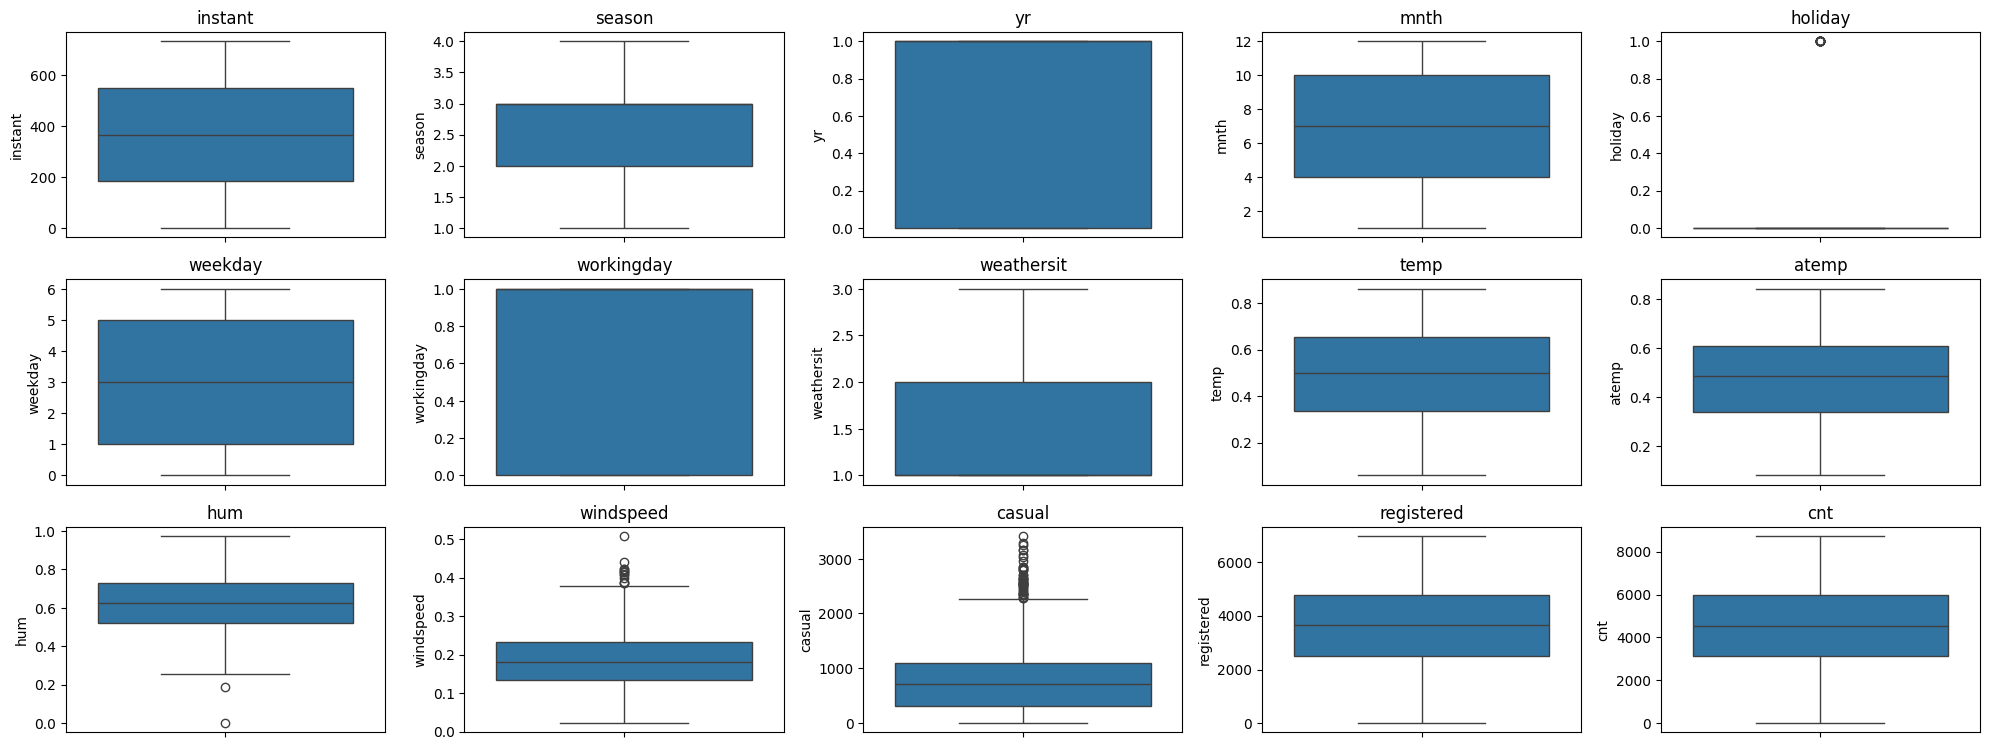

In [15]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(day_df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4,len(day_df.columns)//4+1, i)
    sns.boxplot(y=day_df[column])
    plt.title(column)

plt.tight_layout( )
plt.show()

### Cleaning Data

Pada cleaning data ini akan diubah tipe data pada kolom dteday dari yang sebelumnya object menjadi datetime. Sedangkan untuk outlier akan dibiarkan karena value tersebut merupakan hasil pengukuran yang sebenarnya, dimana dapat dilihat melalui describe() bahwa tidak terdapat inaccurate value.

In [16]:
#Mengubah tipe data dteday menjadi datetime pada data frame day_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [38]:
#Mengubah tipe data dteday menjadi datetime pada data frame hour_df
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data pada dteday sudah berganti menjadi datetime pada kedua dataframe, dengan demikian proses cleaning data telah selesai.


## Exploratory Data Analysis (EDA)

### Explore Jumlah Pengguna Pada Tiap Tahun


In [17]:
#Menghitung total pengguna per tahun
total_cnt = day_df.groupby(by="yr")['cnt'].sum()
print(total_cnt)

yr
0    1243103
1    2049576
Name: cnt, dtype: int64


Dari hasil di atas diketahui bahwa **jumlah pelanggan(cnt)** pada **tahun 1 (2012)** memiliki jumlah yang **lebih banyak** dibandingkan pada **tahun 0 (2011)**. Selanjutnya akan dieksplorasi lebih lanjut bagaimana kinerja penyewaan sepeda pada tahun 2012 dari bulan ke bulan.


In [18]:
#Menghitung total pengguna bulanan pada 2012
monthly_cnt = day_df[day_df['yr'] == 1].groupby('mnth')['cnt'].sum().reset_index()
print (monthly_cnt)

    mnth     cnt
0      1   96744
1      2  103137
2      3  164875
3      4  174224
4      5  195865
5      6  202830
6      7  203607
7      8  214503
8      9  218573
9     10  198841
10    11  152664
11    12  123713


Karena kolom bulan pada dataset telah tersedia maka data dapat langsung dieksplorasi, namun jika pada dataset belum ada kolom bulan (mnth) dapat dilakukan resample seperti berikut:

In [19]:
monthly_share_df = day_df[day_df['yr'] == 1].resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})  #yr == 1 menunjukkan tahun yang dipilih, yaitu 2012
monthly_share_df.index = monthly_share_df.index.strftime('%Y-%m')
monthly_share_df = monthly_share_df.reset_index()
monthly_share_df.rename(columns={
    "dteday": "Monthly",
    "cnt": "count"
}, inplace=True)
print (monthly_share_df)

    Monthly   count
0   2012-01   96744
1   2012-02  103137
2   2012-03  164875
3   2012-04  174224
4   2012-05  195865
5   2012-06  202830
6   2012-07  203607
7   2012-08  214503
8   2012-09  218573
9   2012-10  198841
10  2012-11  152664
11  2012-12  123713


Untuk mengetahui peforma penyewaan pada tahun 2012 dari bulan ke bulan maka perlu dilakukan resample dari yang sebelumnya data time masih berbentuk harian menjadi bulanan. Sehingga dapat diketahui jumlah penyewaan perbulannya di tahun 2012. Selanjutnya dapat dilakukan eksplorasi banyaknya pengunjung per harinya.

In [20]:
#Menghitung total pengguna harian pada 2012
daily_cnt = day_df[day_df['yr'] == 1].groupby('weekday')['cnt'].sum()
print (daily_cnt)

weekday
0    266953
1    275282
2    288771
3    303879
4    310843
5    305784
6    298064
Name: cnt, dtype: int64


In [21]:
#Mencari hari yang paling ramai pengguna
daily_cnt.idxmax()

4

Dari output tersebut diketahui pada 2012 jumlah pelanggan terbanyak terdapat pada hari ke-4 atau hari Kamis. Selanjutnya dapat pula dihitung jumlah pengguna terbanyak pada tiap jamnya.

In [22]:
#Menghitung total pengguna per jam pada 2012
hourly_cnt = hour_df[hour_df['yr'] == 1].groupby('hr')['cnt'].sum()
print (hourly_cnt)

hr
0      23590
1      14606
2       9691
3       4733
4       2611
5       9104
6      34331
7      97241
8     165534
9      99952
10     78746
11     94722
12    115216
13    115580
14    109170
15    114559
16    142126
17    209228
18    192787
19    140987
20    101732
21     76570
22     57935
23     38825
Name: cnt, dtype: int64


In [23]:
#Mencari jam yang paling ramai pengguna
hourly_cnt.idxmax()

17

Dari hasil diperoleh paling banyak pengguna datang pada jam 17.00. Dimana dalam tahun 2012 terdapat 209228 pengguna menyewa sepeda pada jam 17.00.

### Explore Jumlah Pengguna Berdasarkan Tipe Pengguna

In [24]:
#Membuat korelasi matriks antara Jumlah Pengguna dan Tipe Pengguna
correlation_matrix = day_df[['cnt', 'registered', 'casual']].corr()

print(correlation_matrix)

                 cnt  registered    casual
cnt         1.000000    0.945517  0.672804
registered  0.945517    1.000000  0.395282
casual      0.672804    0.395282  1.000000


Dari correlation matrix diatas dapat dilihat antara **Jumlah User(cnt)** dengan **Registered User(registered)** memiliki korelasi sebesar **0.945** nilai tersebut menunjukkan adanya korelasi positif yang sangat kuat. Ini berarti bahwa ketika satu **registered** meningkat, **cnt** akan meningkat. Sedangkang untuk **Jumlah User(cnt)** dengan **Casual User(casual)** memiliki nilai korelasi sebesar **0.67** menunjukkan adanya korelasi positif moderat yang artinya, ketika variabel **casual** meningkat, variabel **cnt** cenderung meningkat, **namun hubungan ini tidak sekuat korelasi antara Jumlah User(cnt) dengan Registered User(registered).**

In [25]:
#Total pengunjung per tahun berdasarkan tipe user
day_df.groupby(by="yr").agg({
    'cnt': 'sum',        # jumlah total user
    'casual': 'sum',     # jumlah casual user
    'registered': 'sum'  # jumlah registered user
})

,cnt,casual,registered
yr,,,
0,1243103,247252,995851
1,2049576,372765,1676811


## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Bagaimana kinerja penyawaan sepeda pada setahun terakhir?**

   yr      cnt
0   0  1243103
1   1  2049576


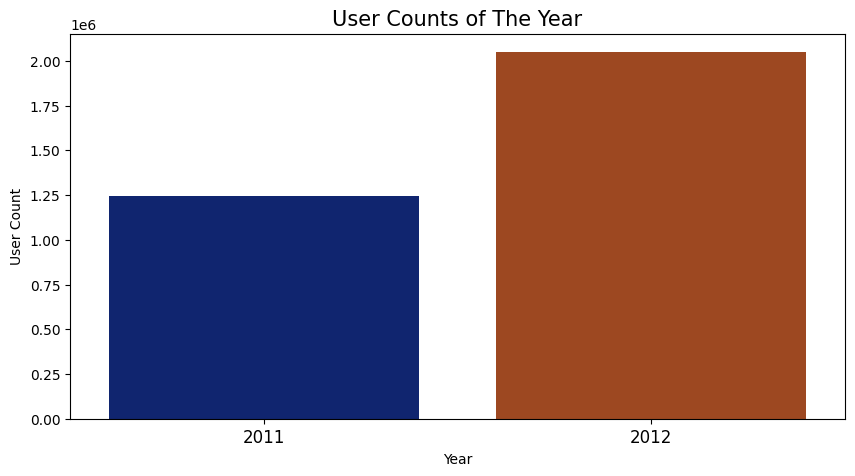

In [26]:
##Menampilkan total pengguna per tahun
total_cnt = day_df.groupby('yr').agg({'cnt': 'sum'}).reset_index()
print(total_cnt)

plt.figure(figsize=(10, 5))

sns.barplot(x= 'yr', y= 'cnt', hue = 'yr', legend=False, data = total_cnt, palette='dark')
plt.title("User Counts of The Year", loc="center", fontsize=15)
plt.ylabel("User Count")
plt.xlabel("Year")
plt.xticks(range(0, 2), ['2011', '2012'])
plt.tick_params(axis='x', labelsize=12)
plt.show()

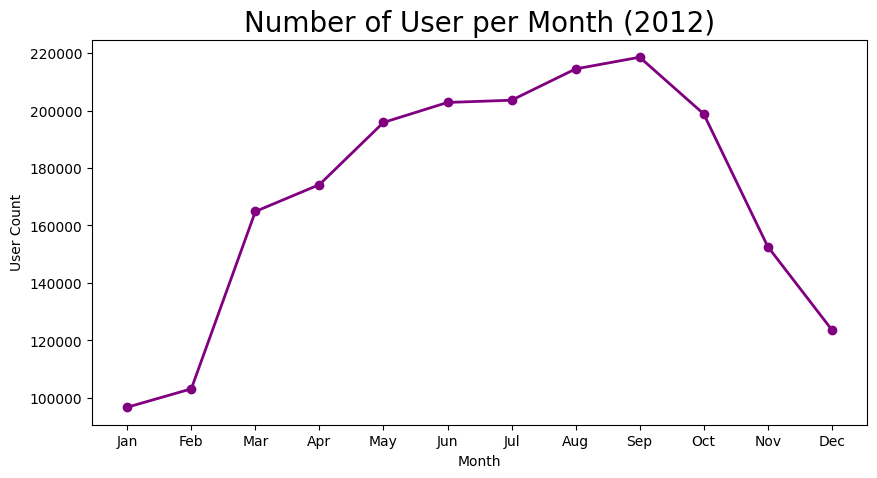

In [27]:
#Visualisasi kinerja penyewaan sepeda selama 2012 per bulan
monthly_cnt = day_df[day_df['yr'] == 1].groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(monthly_cnt['mnth'], monthly_cnt["cnt"], marker='o',color='purple', linewidth=2)
plt.title("Number of User per Month (2012)", loc="center", fontsize=20)
plt.xlabel('Month')
plt.ylabel('User Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Dari plot dapat dilihat bahwa pada bulan September 2012 penggunaan sepeda mengalami lonjakan, sedangkan penggunaan sepeda paling sedikit terdapat pada Bulan Januari 2012.

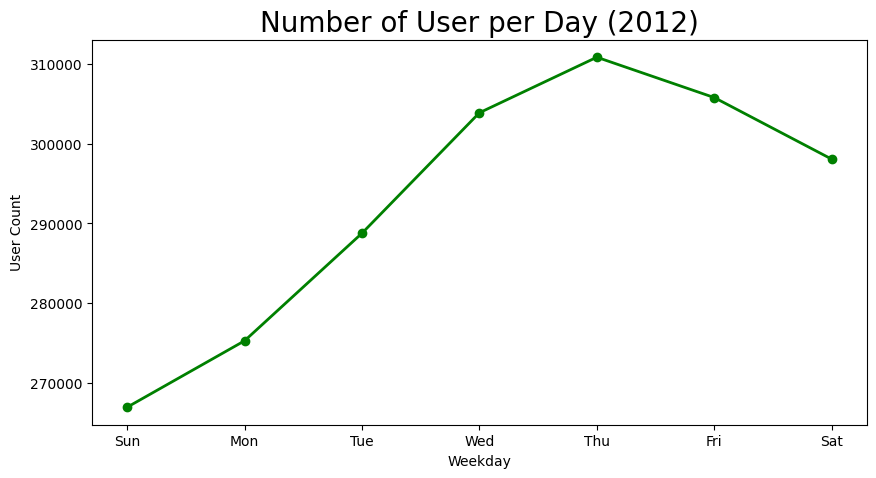

In [28]:
#Visualisasi kinerja harian penyewaan sepeda selama 2012
daily_cnt = day_df[day_df['yr'] == 1].groupby('weekday')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(daily_cnt['weekday'], daily_cnt["cnt"], marker='o', linewidth=2, color="green")
plt.title("Number of User per Day (2012)", loc="center", fontsize=20)
plt.xlabel('Weekday')
plt.ylabel('User Count')
plt.xticks(range(0, 7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Dari plot dapat dilihat bahwa selama tahun 2012 pada hari Kamis penggunaan sepeda mengalami lonjakan, sedangkan penggunaan sepeda paling sedikit terdapat pada hari Minggu


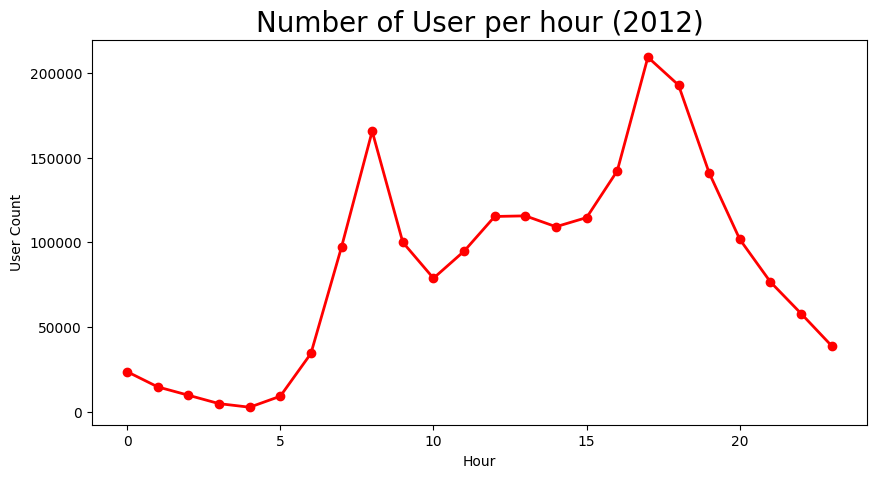

In [29]:
#Visualisasi kinerja per jam penyewaan sepeda selama 2012
hourly_cnt = hour_df[hour_df['yr'] == 1].groupby('hr')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(hourly_cnt['hr'], hourly_cnt["cnt"], marker='o', linewidth=2, color="red")
plt.title("Number of User per hour (2012)", loc="center", fontsize=20)
plt.xlabel('Hour')
plt.ylabel('User Count')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Dari plot dapat dilihat bahwa selama 2012 pada jam 17.00 penggunaan sepeda mengalami lonjakan, sedangkan penggunaan sepeda paling sedikit terdapat pada jam 04.00.


### Pertanyaan 2:

**Bagaimana pola penyewaan sepeda berdasarkan tipe user untuk meningkatkan strategi penawaran dan pemasaran?**

   yr  registered
0   0      995851
1   1     1676811
   yr  casual
0   0  247252
1   1  372765


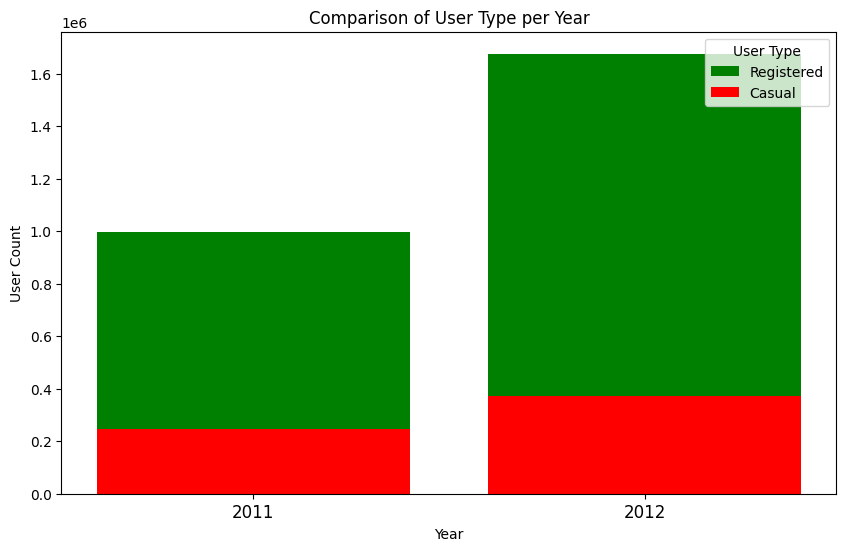

In [30]:
#Visualisasi pola penyewaan sepeda berdasarkan tipe user
registered_cnt = day_df.groupby('yr')['registered'].sum().reset_index()
print(registered_cnt)
casual_cnt = day_df.groupby('yr')['casual'].sum().reset_index()
print (casual_cnt)

# Membuat barplot dengan Seaborn
plt.figure(figsize=(10, 6))
plt.bar(registered_cnt['yr'], registered_cnt['registered'], color='green', label='Registered')
plt.bar(casual_cnt['yr'], casual_cnt['casual'], color='red', label='Casual')
plt.title('Comparison of User Type per Year')
plt.xlabel('Year')
plt.xticks(range(0, 2), ['2011', '2012'])
plt.ylabel('User Count')
plt.legend(title='User Type', loc='upper right')
plt.tick_params(axis='x', labelsize=12)
plt.show()

Dari bar plot diatas diketahui bahwa bagian yang berwarna merah jauh lebih sedikit dari pada bagian yang berwarna hijau. Ini berarti bahwa casual user memiliki kontribusi yang lebih sedikit dibandingkan dengan registered user dalam penggunaan sepeda.

## Conclusion

- Conclusion pertanyaan 1

**Bagaimana kinerja penyawaan sepeda pada setahun terakhir?**

Dari analisis data yang telah dilakukan kinerja penyewaan sepeda mengalami kenaikan dari pada tahun sebelumnya. Pada 2011 jumlah pengguna berada pada angka 1243103 dan pada tahun 2012 berada di angka 2049576. Sedangkan untuk kinerja per bulannya pada tahun 2012 mengalami lonjakan pengguna pada bulan September dengan jumlah pengguna 218573 dan menurun drastis pada bulan Desember 2012 sejumlah 123713. Walaupun mengalami penurunan, jumlah tersebut masih lebih banyak dari pada awal tahun 2012. Berdasarkan hariannya selama 2012 pengguna paling banyak terdapat pada hari Kamis dan berdasarkan jamnya, jam yang memiliki banyak pengguna terdapat pada jam 17.00




---




- Conclusion pertanyaan 2

**Bagaimana pola penyewaan sepeda berdasarkan tipe user untuk meningkatkan strategi penawaran dan pemasaran?**

Berdasarkan hasil analisis yang telah diperoleh, diketahui bahwa jumlah pengguna yang terdaftar (*registered user*) memiliki kuantitas yang lebih tinggi dari pada pengguna biasa (*casual user*). Dari hasil tersebut dapat ditarik kesimpulan bahwa kontribusi *registered user* lebih besar dari pada *casual user* dalam penggunaan sepeda. Dengan demikian perusahaan persewaan sepeda dapat memberikan atau *loyalti program* kepada *registered user* yang telah setia menggunakan sepeda. Serta untuk meningkatkan pengguna dari *casual user* perusahaan dapat memberikan penawaran menarik kepada casual user lainnya.

In [31]:
day_df.to_csv("day_data.csv", index=False)

In [39]:
hour_df.to_csv("hour_data.csv", index=False)